In [19]:
from torch.utils.data import Dataset, TensorDataset, DataLoader

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# requirement  pip install numpy==1.26.4

In [5]:
import tensorflow as tf

C:\Users\basiu\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
from tensorflow.keras.applications import ResNet50

In [86]:
cifar10 = tf.keras.datasets.cifar10

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(f"X_train.shape: {X_train.shape} \nY_train.shape: {Y_train.shape} \nX_test.shape: {X_test.shape} \nY_test.shape: {Y_test.shape}")

X_train.shape: (50000, 32, 32, 3) 
Y_train.shape: (50000, 1) 
X_test.shape: (10000, 32, 32, 3) 
Y_test.shape: (10000, 1)


In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck'] # 0-9 labels decoded

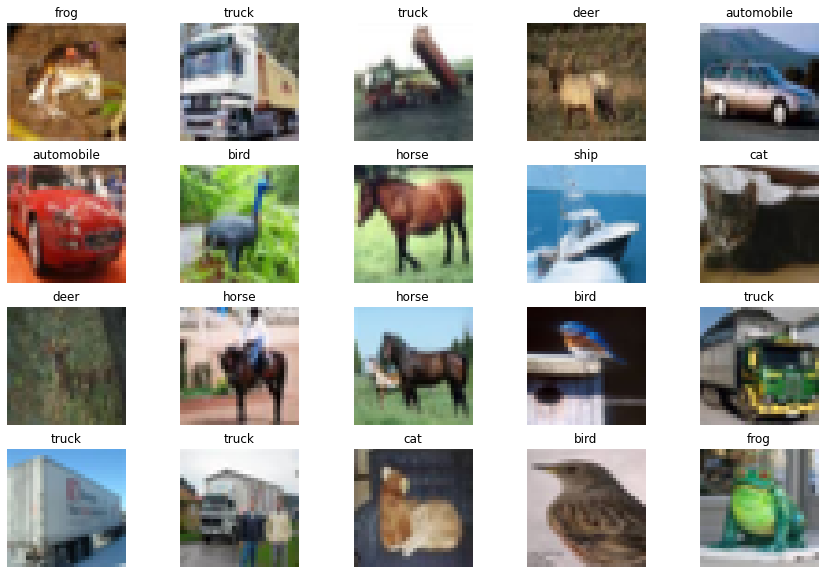

In [65]:
def show_images_grid(images, labels, num=20):
    fig, axes = plt.subplots(4, 5, figsize=(15, 10))
    axes = axes.flatten()
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(class_names[labels[i][0]])
        ax.axis('off')
    plt.show()

show_images_grid(X_train, Y_train)

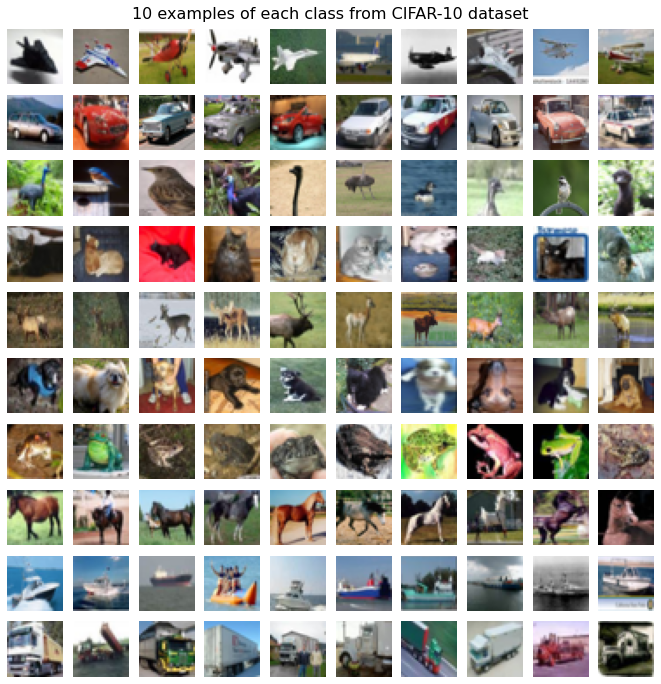

In [66]:
def show_images_from_each_class(images, labels, num_images=10):
    fig, axes = plt.subplots(10, num_images, figsize=(num_images, 10))
    #axes = axes.flatten()
    for class_index in range(10):
        class_images = images[labels.flatten() == class_index][:num_images]
        for j in range(num_images):
                axes[class_index, j].imshow(class_images[j])
                axes[class_index, j].axis('off')

        axes[class_index, 0].set_ylabel(class_names[class_index], fontsize=12, rotation=0, labelpad=40, ha='right', va='center')

    plt.suptitle("10 examples of each class from CIFAR-10 dataset", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    plt.show()


show_images_from_each_class(X_train, Y_train)

In [67]:
pipeline = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224,224)),  # Changing smaller dimension to 128 and scaling second one 
    transforms.GaussianBlur(5), #noise reduction filter with kernel size = 5
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [87]:
class TransformedDataset(Dataset):
    def __init__(self, dataset, transform):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        image = image[:3, :, :]  # Assuming the image has more than 3 channels, selecting the first 3 channels
        if self.transform:
            image = self.transform(image)
        return image, label
    
#   
X_train = torch.tensor(X_train).permute(0, 3, 1, 2)  # Transforming from (batch, height, width, channels) to (batch, channels, height, width)
X_test = torch.tensor(X_test).permute(0, 3, 1, 2)
train_dataset = torch.utils.data.TensorDataset(X_train, torch.tensor(Y_train))
test_dataset = torch.utils.data.TensorDataset(X_test, torch.tensor(Y_test))    
train_loader = DataLoader(TransformedDataset(train_dataset, pipeline), batch_size=32, shuffle=True)
test_loader = DataLoader(TransformedDataset(test_dataset, pipeline), batch_size=32, shuffle=False)

In [88]:
print(f"X_train.shape: {X_train.shape} \nY_train.shape: {Y_train.shape} \nX_test.shape: {X_test.shape} \nY_test.shape: {Y_test.shape}")

X_train.shape: torch.Size([50000, 3, 32, 32]) 
Y_train.shape: (50000, 1) 
X_test.shape: torch.Size([10000, 3, 32, 32]) 
Y_test.shape: (10000, 1)


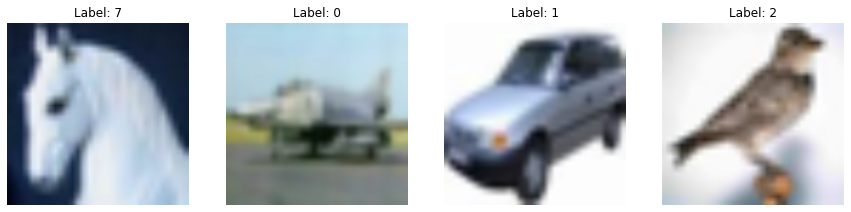

In [89]:
# plotting 4 first preprocessed images 
for inputs, labels in train_loader:
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    for i in range(4):
        first_image = inputs[i]  # Tensor image
        first_label = labels[i]  # Label 
        inp = first_image.numpy().transpose((1, 2, 0)) #converting to correct format for plotting
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        inp = std * inp + mean #denormalization for better plot visibility 
        inp = np.clip(inp, 0, 1)
        axes[i].imshow(inp) 
        axes[i].set_title(f'Label: {first_label.item()}')  
        axes[i].axis('off')
    plt.show()
    break

# ResNet model

In [101]:
for image, label in train_loader:
    print("Image shape: ",image.shape)
    print("Image tensor: ", image)
    print("Label: ", label)
    break

Image shape:  torch.Size([32, 3, 224, 224])
Image tensor:  tensor([[[[ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          ...,
          [ 2.2489,  2.2489,  2.2489,  ...,  2.1975,  2.1975,  2.1975],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.1975,  2.1975,  2.1975],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.1975,  2.1975,  2.1975]],

         [[ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          ...,
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286]],

         [[ 2.6400,  2.6400,  2.6400,  ...,

In [91]:
resnet = models.resnet50(pretrained=True)

for param in resnet.parameters():
    param.requires_grad = False  #setting all weights and biases to zero

num_ftrs = resnet.fc.in_features #number of features (2048)
resnet.fc = nn.Linear(num_ftrs, 10)  #replaces default layer with our which outputs 10 classes for our data.

C:\Users\basiu\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\basiu\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\basiu/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:10<00:00, 10.1MB/s]


ResNet model loaded and modified for CIFAR-10!


In [92]:
criterion = nn.CrossEntropyLoss() #our loss function

In [93]:
optimizer = optim.Adam(resnet.fc.parameters(), lr=0.001) #faster than gradient descent, step size set to 0.001

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    resnet.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader: # we want to process in batches (32 images per batch)
        images, labels = images.to(device), labels.to(device) #moving the data to CPU or GPU if available
        
        if labels.dim() > 1:  # Check if labels are one-hot encoded
            labels = labels.argmax(dim=1)
        
        optimizer.zero_grad() #clearing the previous gradients
        outputs = resnet(images) #passing the images through the model and getting predictions
        loss = criterion(outputs, labels)  #comparing the predictions and actual labels
        loss.backward()  #backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item() #adding the loss of current batch
        _, predicted = torch.max(outputs, 1) #lass with the highest probability as the prediction
        correct += (predicted == labels).sum().item() #how many correct prediction in this batch
        total += labels.size(0) 

    train_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")


Epoch 1/10, Loss: 0.0022, Accuracy: 99.94%
